This notebook shows primary color analysis of color image using K-Means algorithm.
The output are N primary colors and their corresponding percentage.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import numpy as np
import requests

In [2]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar


D:\Work\python\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


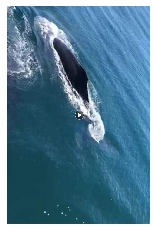

In [3]:
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
# image_path = './data/blue.jpg'
# image = cv2.imread(image_path)

file = requests.get("https://heibox.uni-heidelberg.de/thumbnail/537e6da0a8b44069bc96/1024/images/100361_asm.png")
image = cv2.imdecode(np.fromstring(file.content, np.uint8), 1) 

# BGR-->RGB cv to matplotlib show
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)




In [4]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters=8)
clt.fit(image)


KMeans()

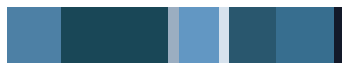

In [5]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [6]:
for (percent, color) in zip(hist, clt.cluster_centers_):
    print("color:", color, " percentage:", percent)

color: [ 77.76698757 128.28204339 165.96299379]  percentage: 0.16058494931175596
color: [25.29263839 71.3618333  87.54236293]  percentage: 0.3200872512090774
color: [155.80541776 174.2755036  193.92529008]  percentage: 0.033579508463541664
color: [ 98.48296596 151.14026489 195.62122263]  percentage: 0.1207304454985119
color: [214.33832526 226.05319826 237.80066559]  percentage: 0.029695056733630952
color: [ 41.23904221  87.43521853 110.21054107]  percentage: 0.13949294317336308
color: [ 55.63054299 110.13142583 143.02665344]  percentage: 0.17341105143229166
color: [19.07875802 25.57516043 41.18506515]  percentage: 0.02241879417782738
